### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("E:\\mlprojects\\notebook\\data\\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values in the dataset.

In [9]:
df[df.isnull().any(axis=1)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

df.drop_dupicated(inplace=True) - code to remove duplicate values.

In [15]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [16]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [17]:
df["race_ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

df.nunique() - It will check the umber of unique items in each column.

In [24]:
print("Categories in Gender : ",df["gender"].unique())
print("Categories in race_ethnicity  : ",df["race_ethnicity"].unique())
print("Categories in parental_level_of_education  : ",df["parental_level_of_education"].unique())
print("Categories in lunch   : ",df["lunch"].unique())
print("Categories in test_preparation_course    : ",df["test_preparation_course"].unique())






Categories in Gender :  ['female' 'male']
Categories in race_ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch   :  ['standard' 'free/reduced']
Categories in test_preparation_course    :  ['none' 'completed']


In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]

In [30]:
print("We have {} numeric feature : {}".format(len(numeric_features), numeric_features))
print("We have {} categocical features : {}".format(len(categorical_features), categorical_features))

We have 3 numeric feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categocical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [31]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
reading_full = df[df["reading_score"]==100]["average"].count()
writing_full = df[df["writing_score"]==100]["average"].count()
maths_full = df[df["math_score"]==100]["average"].count()

In [35]:
print("Students with full marks in reading : {}".format(reading_full))
print('Students with full marks in wriring : {}'.format(writing_full))
print("Students with full marks in maths : {}".format(maths_full))

Students with full marks in reading : 17
Students with full marks in wriring : 14
Students with full marks in maths : 7


In [38]:
maths_less_than_20 = df[df["math_score"]<=20]["average"].count()
reading_less_than_20 = df[df["reading_score"]<=20]["average"].count()
writing_less_than_20 = df[df["writing_score"]<=20]["average"].count()

print("Students with less than 20 marks in reading : {}".format(reading_less_than_20))
print('Students with less than 20 marks in writing : {}'.format(writing_less_than_20))
print("Students with less than 20 marks in maths : {}".format(maths_less_than_20))

Students with less than 20 marks in reading : 1
Students with less than 20 marks in writing : 3
Students with less than 20 marks in maths : 4


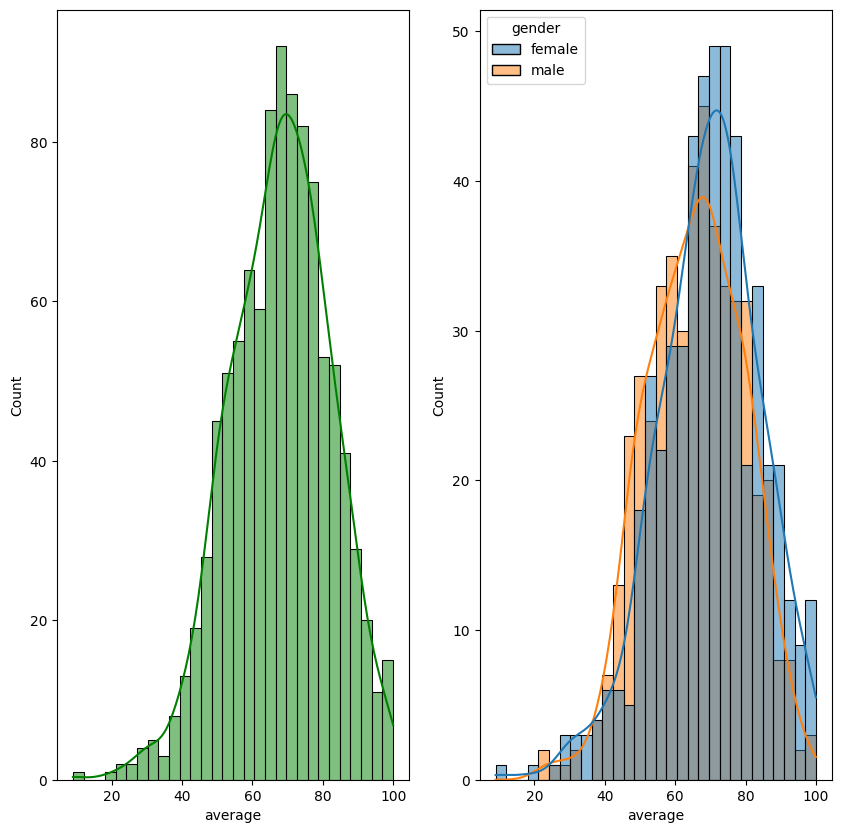

In [42]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(1,2,2)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")
plt.show()

<Axes: xlabel='total_score', ylabel='Count'>

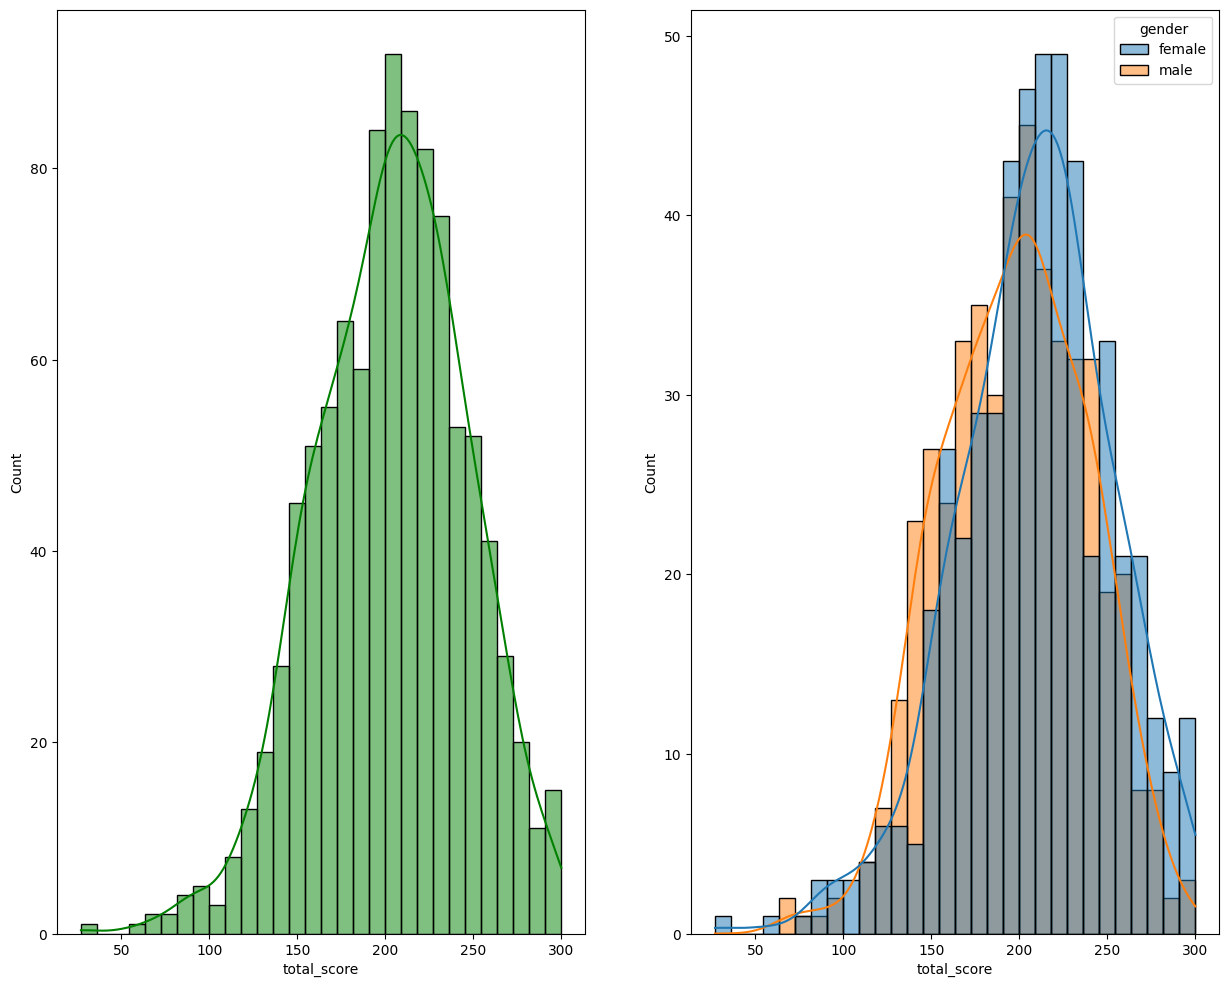

In [44]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color="g")
plt.subplot(1,2,2)
sns.histplot(data=df,x="total_score",bins=30,kde=True, hue="gender")

<Axes: title={'center': 'Male Performance'}, xlabel='average', ylabel='Count'>

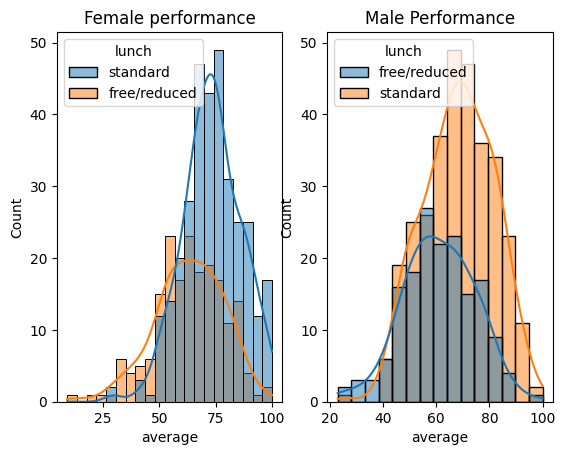

In [47]:
plt.subplot(1,2,1)
plt.title("Female performance")
sns.histplot(data=df[df.gender=="female"], x = "average", kde=True, hue="lunch")
plt.subplot(1,2,2)
plt.title("Male Performance")
sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="lunch")

#### 4.2 Maximumum score of students in all three subjects

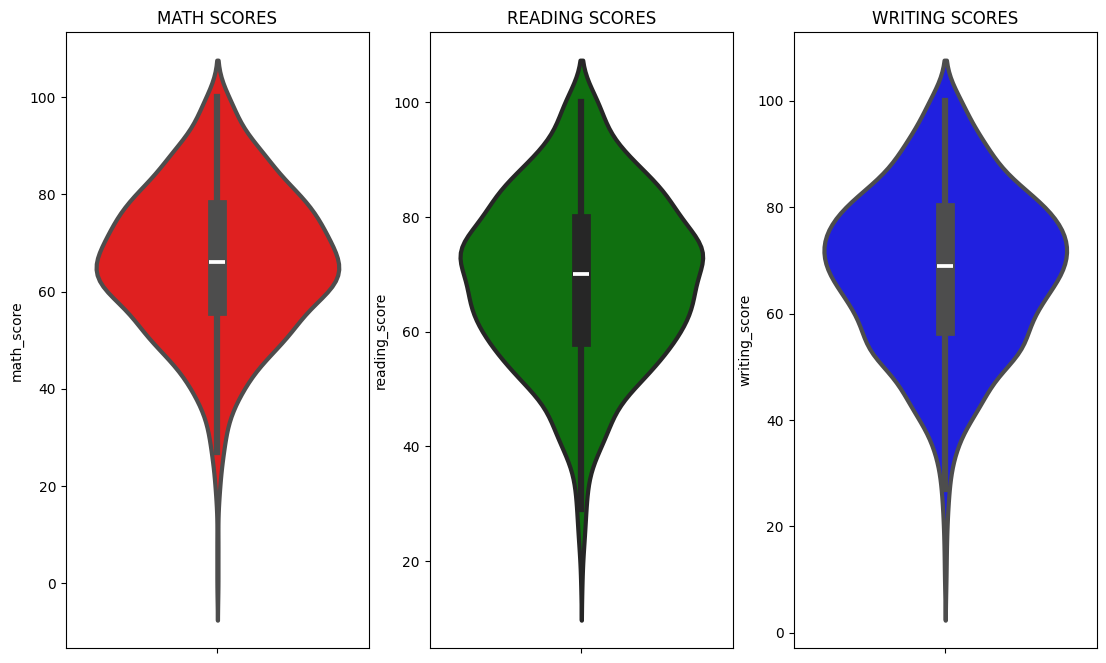

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()